<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [38]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-11-24 15:53:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  34.6MB/s    in 1.0s    

2023-11-24 15:53:47 (34.6 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [39]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [40]:
import pandas as pd

## Demo: How to run an sql query


In [27]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [23]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

ProgrammingError: ignored

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

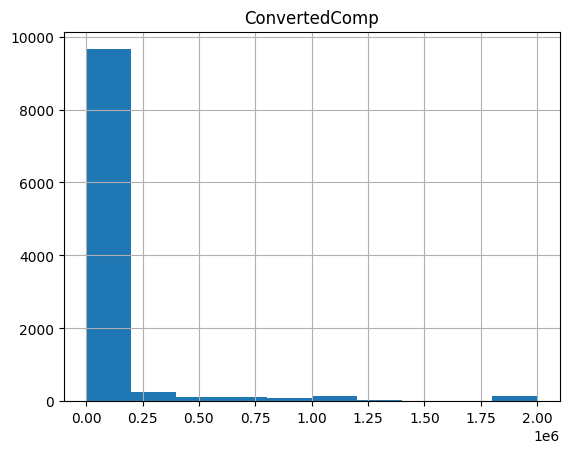

In [28]:
import matplotlib.pyplot as plt
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


<Axes: >

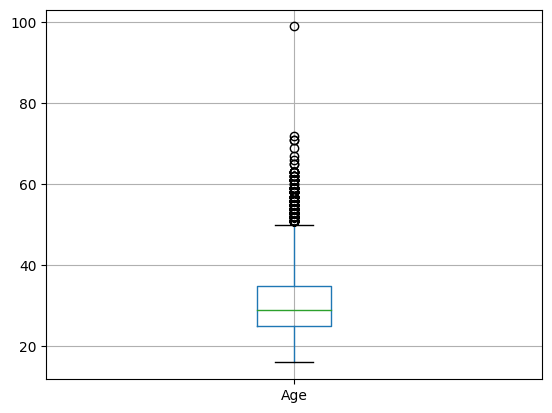

In [29]:
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.boxplot(column='Age')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


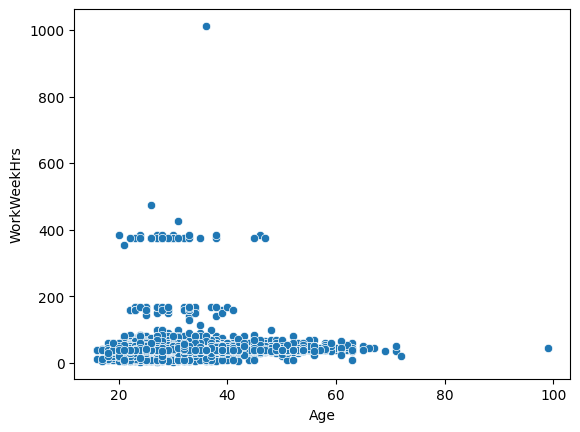

In [30]:
%matplotlib inline
import seaborn as sns

QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)
plot = sns.scatterplot(x='Age', y='WorkWeekHrs', data=df)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


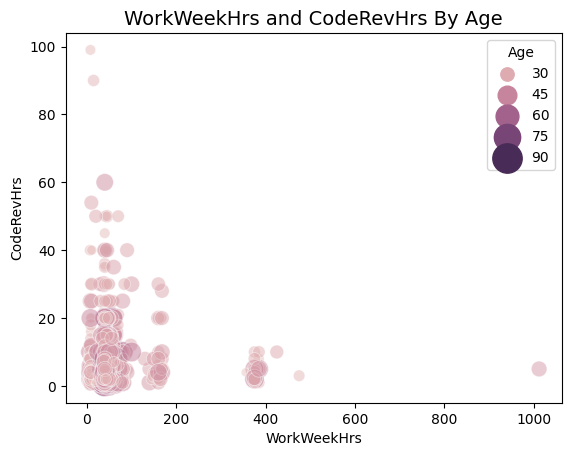

In [31]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df1, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500))

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14)
plt.xlabel('WorkWeekHrs', size=10)
plt.ylabel('CodeRevHrs', size=10)

plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


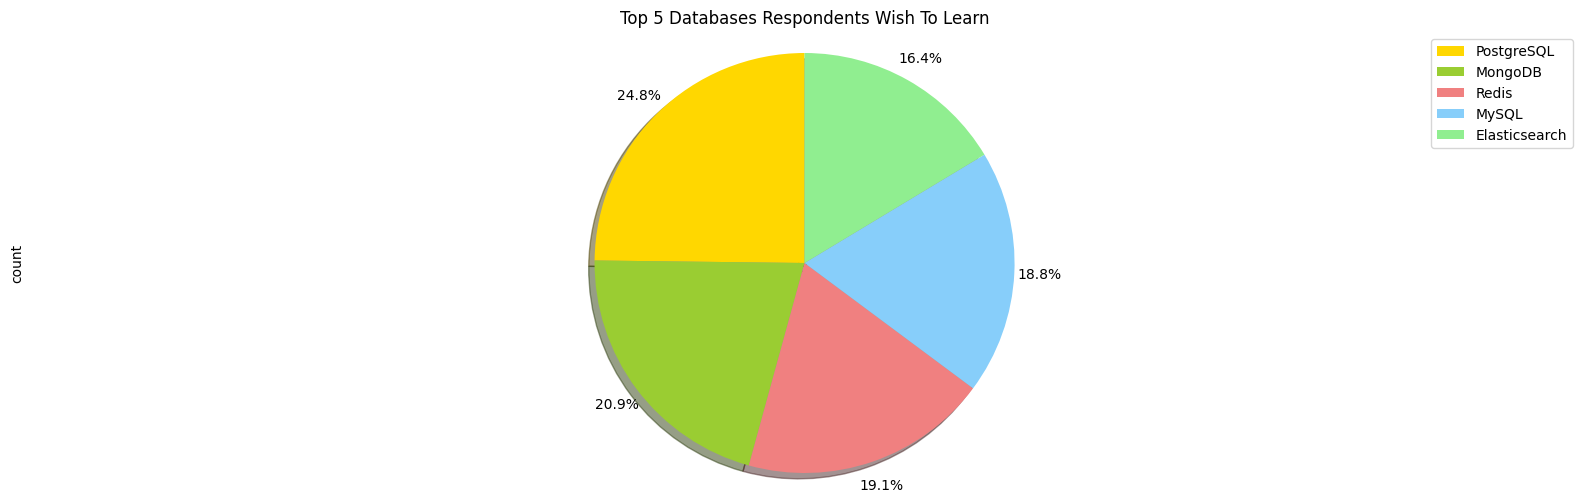

In [32]:
import matplotlib as mpl
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""

df=pd.read_sql_query(QUERY,conn)
df.set_index('DatabaseDesireNextYear', inplace=True)

colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Databases Respondents Wish To Learn')
plt.axis('equal')
plt.show()


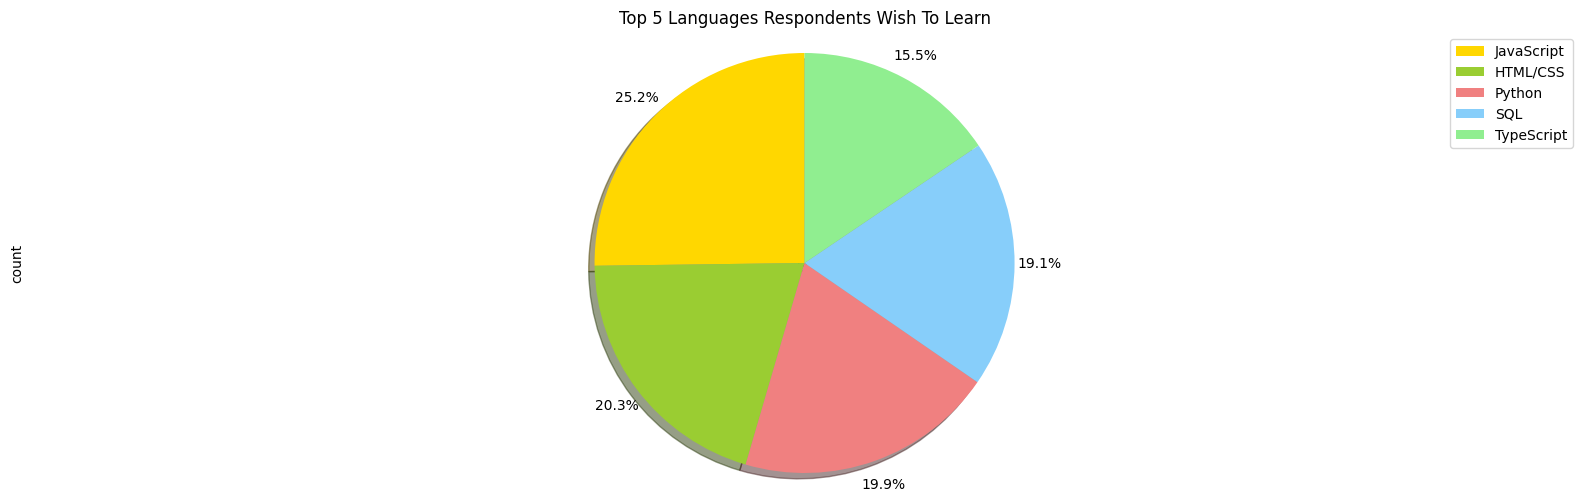

In [41]:
import matplotlib as mpl
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as count
from LanguageDesireNextYear
group by LanguageDesireNextYear
order by count(LanguageDesireNextYear) DESC LIMIT 5
"""

df=pd.read_sql_query(QUERY,conn)
df.set_index('LanguageDesireNextYear', inplace=True)

colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

df['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, startangle=90, colors=colors_list, shadow=True, pctdistance=1.12)

plt.legend(labels=df.index, loc='upper right')
plt.title('Top 5 Languages Respondents Wish To Learn')
plt.axis('equal')
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


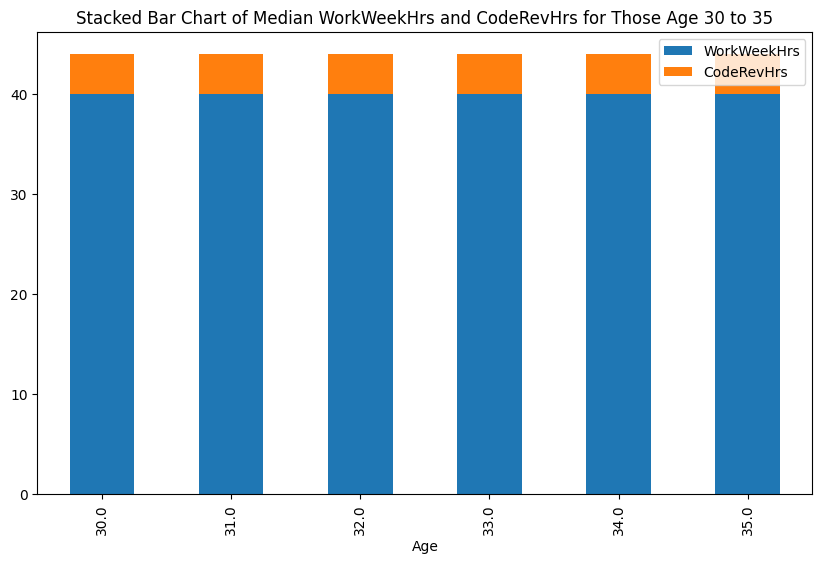

In [33]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


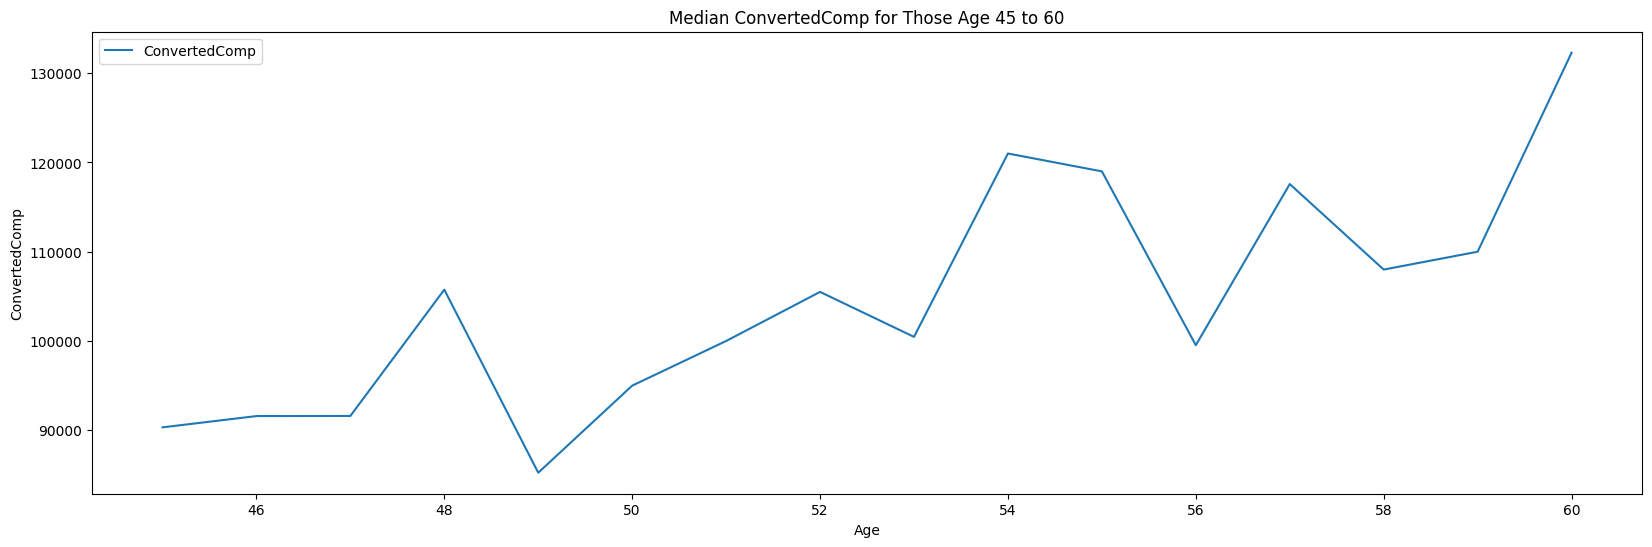

In [34]:
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(20, 6))

plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


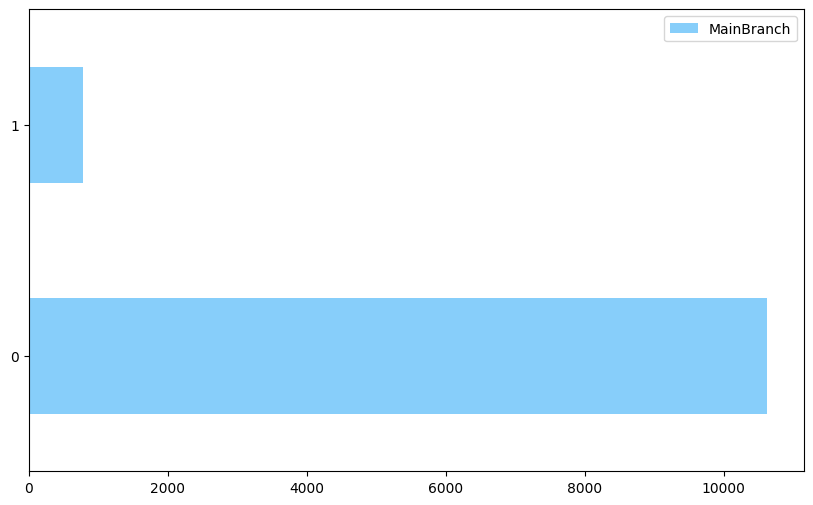

In [35]:
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from master
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()


Close the database connection.


In [36]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
